In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [8]:
os.chdir('C:\Apurva\Conservation Games\Games meta-analysis\Datasets\Data Gabon, Orkney, Madagascar and Kenya')
print(os.getcwd())

C:\Apurva\Conservation Games\Games meta-analysis\Datasets\Data Gabon, Orkney, Madagascar and Kenya


In [9]:
# read into dataframe
data = pd.read_csv('combined6.csv', index_col=0)

In [10]:
data['z_envProduction'] = data.groupby('country')['envProduction'].transform(lambda x: scale(x.astype(float)))

In [16]:
data[['envProduction', 'country']].groupby('country').describe()

envProduction                                                   \
                 count         mean          std   min      25%     50%   
country                                                                   
KEN              653.0  1760.454824  1769.788587   0.0   180.00  1305.0   
MAD              350.0  3946.594286  1804.381251   0.0  2823.75  4126.5   
cambodia        3744.0  5191.454060  3007.276690   0.0  3140.00  5225.0   
gabon           1492.0  1479.166890   404.641444  64.0  1245.75  1584.0   
orkney           485.0  5904.513402  2481.799319   0.0  4266.00  5952.0   
tanzania        1129.0  2974.325952   864.789512   0.0  2944.00  3264.0   
vietnam         4096.0  8925.385010  3286.316384   0.0  6931.00  9690.0   

                             
               75%      max  
country                      
KEN        2880.00   8974.0  
MAD        5093.25   9673.0  
cambodia   7170.00  12780.0  
gabon      1782.00   2232.0  
orkney     7638.00  12390.0  
tanzania   3520.00   3968.0  
vietnam   11664.00  13392.0

In [17]:
data[['z_envProduction', 'country']].groupby('country').describe()

z_envProduction                                              \
                   count          mean       std       min       25%   
country                                                                
KEN                653.0  5.644625e-17  1.000767 -0.995489 -0.893704   
MAD                350.0 -1.101500e-16  1.001432 -2.190360 -0.623179   
cambodia          3744.0  2.092343e-16  1.000134 -1.726528 -0.682255   
gabon             1492.0  5.918709e-16  1.000335 -3.498508 -0.577042   
orkney             485.0  1.080464e-16  1.001033 -2.381583 -0.660894   
tanzania          1129.0  8.034121e-17  1.000443 -3.440888 -0.035083   
vietnam           4096.0  1.038124e-17  1.000122 -2.716255 -0.606950   

                                        
               50%       75%       max  
country                                 
KEN      -0.257547  0.633072  4.079061  
MAD       0.099848  0.636394  3.178155  
cambodia  0.011156  0.658007  2.523732  
gabon     0.259163  0.748650  1.861118  
orkney    0.019154  0.699201  2.615918  
tanzania  0.335113  0.631270  1.149545  
vietnam   0.232695  0.833441  1.359321

## Distributions country-wise

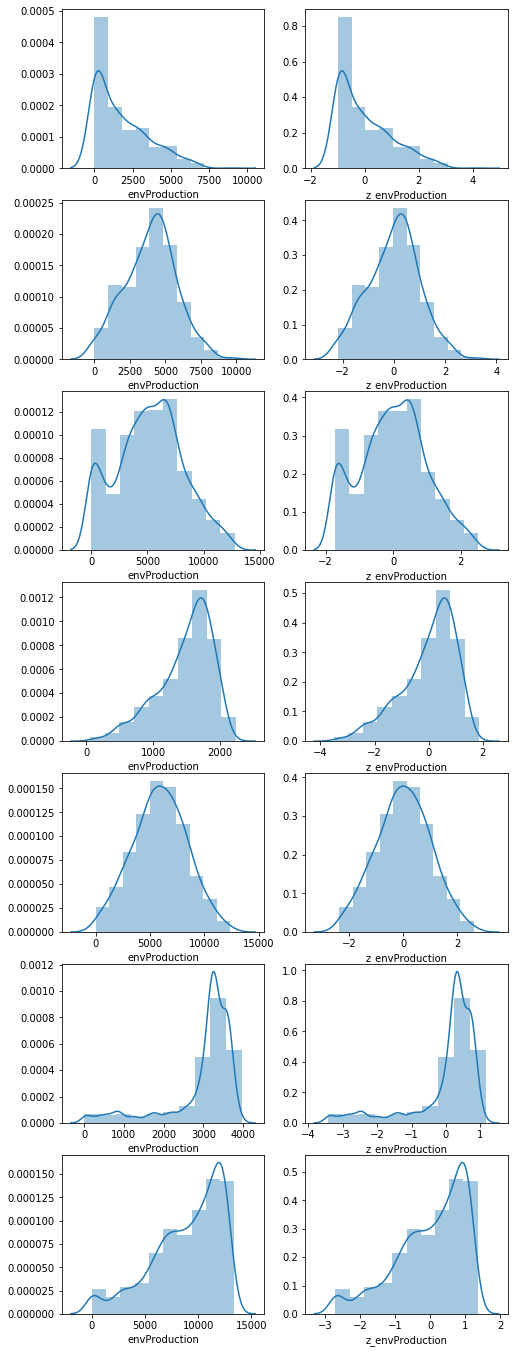

In [24]:
fig, ax = plt.subplots(7, 2, figsize=(8,24))
i=0
for country, group in data.groupby('country'):
    sns.distplot(group['envProduction'], bins=10, ax= ax[i][0])
    sns.distplot(group['z_envProduction'], bins=10, ax=ax[i][1])
    i+=1

## Distributions in combined dataset

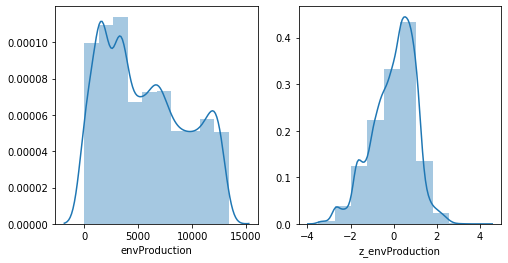

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))
sns.distplot(data['envProduction'], bins=10, ax= ax[0])
sns.distplot(data['z_envProduction'], bins=10, ax=ax[1])
print()

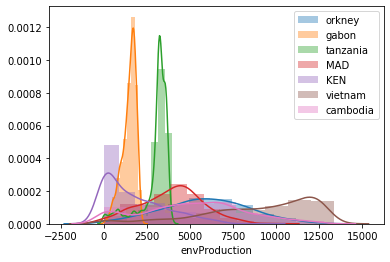

In [43]:
for val in data.country.unique():
    sns.distplot(data[data['country']==val]['envProduction'], bins=10, label=val)
    plt.legend()

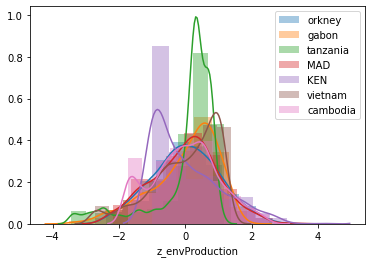

In [44]:
for val in data.country.unique():
    sns.distplot(data[data['country']==val]['z_envProduction'], bins=10, label=val)
    plt.legend()

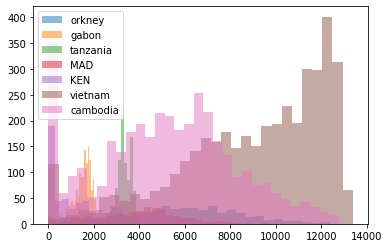

In [39]:
for val in data.country.unique():
    plt.hist(data[data['country']==val]['envProduction'], label=val, alpha=0.5, bins=30)
    plt.legend()

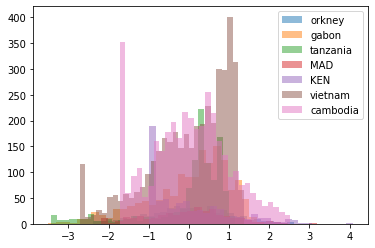

In [40]:
for val in data.country.unique():
    plt.hist(data[data['country']==val]['z_envProduction'], label=val, alpha=0.5, bins=30)
    plt.legend()